In [1]:
!pip install opendatasets
!pip install pandas

In [2]:
import opendatasets as od
import pandas

In [3]:
od.download('https://www.kaggle.com/datasets/ismailnasri20/driver-drowsiness-dataset-ddd')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vishwamgupta0810
Your Kaggle Key: ··········


100%|██████████| 2.58G/2.58G [00:28<00:00, 97.9MB/s]


In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [5]:
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)',
    image_size=(224, 224),
    validation_split=0.3,
    subset='both',
    seed=123,
)

Found 41793 files belonging to 2 classes.
Using 29256 files for training.
Using 12537 files for validation.


In [6]:
base_model=tf.keras.applications.efficientnet.EfficientNetB0(include_top=False,
    weights='imagenet',input_shape=(224,224, 3),)

16705208/16705208 [==============================] - 0s 0us/step


In [7]:
for layer in base_model.layers:
  layer.trainable=False

In [8]:
from tensorflow.keras.layers import Flatten,Dense,Dropout
last_output = base_model.output
x=Flatten()(last_output)
x=Dense(256,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(2,activation='softmax')(x)

In [20]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
model=Model(base_model.input,x)
model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0][0]'] 

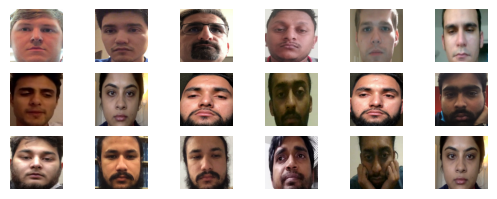

In [21]:
import matplotlib.pyplot as plt
for images, _ in train_ds.skip(1).take(1):
  for i in range(18):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")


In [22]:
r = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
)

Epoch 1/10
915/915 [==============================] - 120s 119ms/step - loss: 0.1365 - accuracy: 0.9878 - val_loss: 0.0125 - val_accuracy: 0.9970
Epoch 2/10
915/915 [==============================] - 104s 113ms/step - loss: 0.0400 - accuracy: 0.9953 - val_loss: 0.0044 - val_accuracy: 0.9995
Epoch 3/10
915/915 [==============================] - 103s 112ms/step - loss: 0.0308 - accuracy: 0.9967 - val_loss: 0.0094 - val_accuracy: 0.9994
Epoch 4/10
915/915 [==============================] - 121s 132ms/step - loss: 0.0261 - accuracy: 0.9981 - val_loss: 0.0135 - val_accuracy: 0.9982
Epoch 5/10
915/915 [==============================] - 105s 115ms/step - loss: 0.0215 - accuracy: 0.9985 - val_loss: 0.0049 - val_accuracy: 0.9997
Epoch 6/10
915/915 [==============================] - 105s 114ms/step - loss: 0.0513 - accuracy: 0.9975 - val_loss: 0.0122 - val_accuracy: 0.9996
Epoch 7/10
915/915 [==============================] - 105s 114ms/step - loss: 0.0240 - accuracy: 0.9988 - val_loss: 0.0034 -

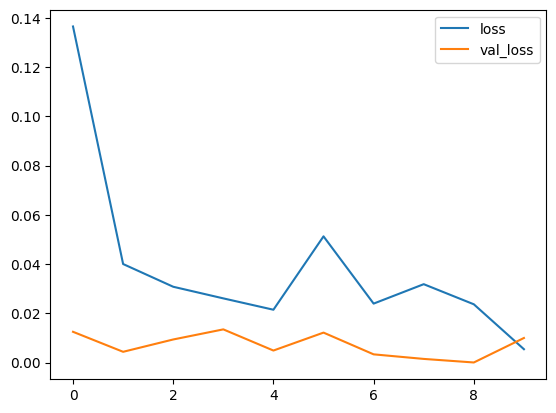

In [23]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

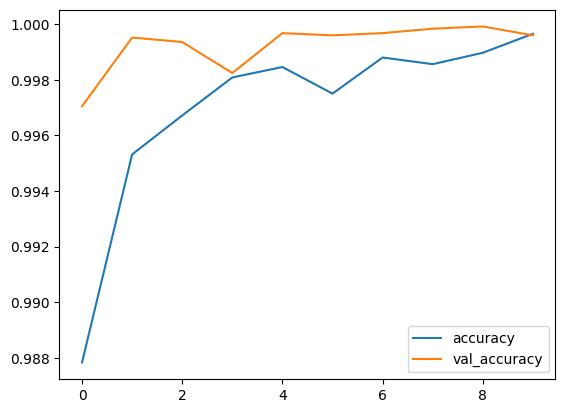

In [24]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend();

In [35]:
import cv2
image=cv2.imread('/content/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Drowsy/I0498.png')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [38]:
image=cv2.resize(image, (224,224))

In [39]:
image.shape

(224, 224, 3)

In [41]:
h,w,c=image.shape
image_batch=image.reshape((1,h,w,c))

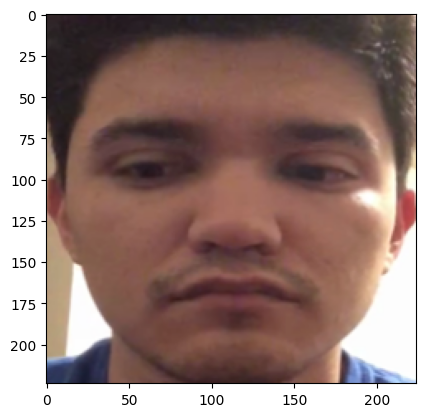

In [42]:
plt.imshow(image)

In [43]:
probs=model.predict(image_batch)

1/1 [==============================] - 2s 2s/step


In [44]:
probs

array([[1., 0.]], dtype=float32)

In [45]:
classes=probs[0].argsort(axis=-1)
classes

array([1, 0])

In [46]:
model.save("drowiness_detection.keras")

In [47]:
model.save("drowiness_detection.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
